In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')#ignores any warnings during execution
train=pd.read_csv('Downloads/train.csv')#train df
test=pd.read_csv("Downloads/test.csv")#test df

In [3]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [2]:
train_original=train.copy()#to copy the df
test_original=test.copy()

In [3]:
submission=pd.read_csv('Downloads/sample_loan.csv')

In [6]:
train.shape,test.shape

((614, 13), (367, 12))

In [11]:
import sweetviz as sv
eda=sv.analyze(train)
eda.show_html('eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [16]:
cat_cols=[x for x in train.dtypes.index if train.dtypes[x]=='object']
cat_cols=[x for x in cat_cols if x!='Loan_ID']

In [17]:
for i in cat_cols :
     print(f'\033[4m \nfrequency count of {i}\033[0m')
     print(train[i].value_counts())

 
frequency count of Gender
Male      489
Female    112
Name: Gender, dtype: int64
 
frequency count of Married
Yes    398
No     213
Name: Married, dtype: int64
 
frequency count of Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 
frequency count of Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
 
frequency count of Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
 
frequency count of Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
 
frequency count of Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [18]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [21]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Univariate Analysis

In [24]:
cat_cols=[x for x in cat_cols if x not in ['Dependents']]
cat_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

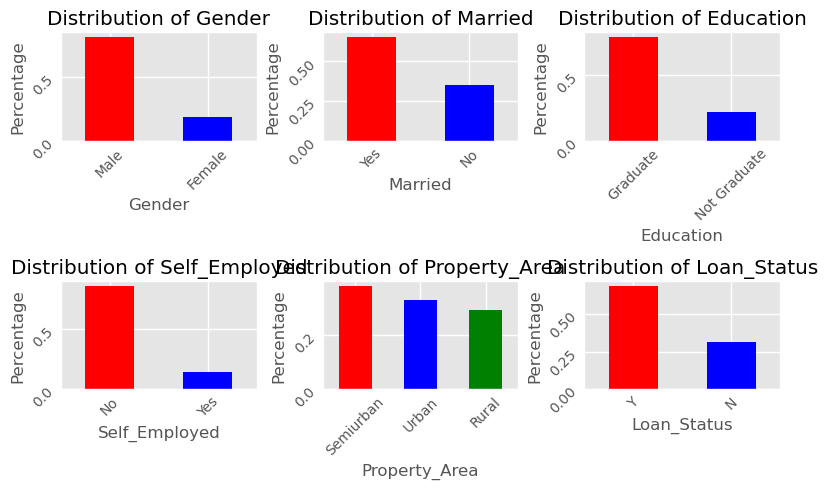

In [28]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(8,5))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over categorical columns and plot them
for i, col in enumerate(cat_cols):
    ax = axes[i]
    train[col].value_counts(normalize=True).plot(kind='bar', ax=ax, color=['r', 'b', 'g'])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.tick_params(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


1)80% of applicants are male 
2)more than 60% are married
3)80% are graduates
4)more than 80% are employees
4)Most of the applicants have property in semi urban places

<Axes: >

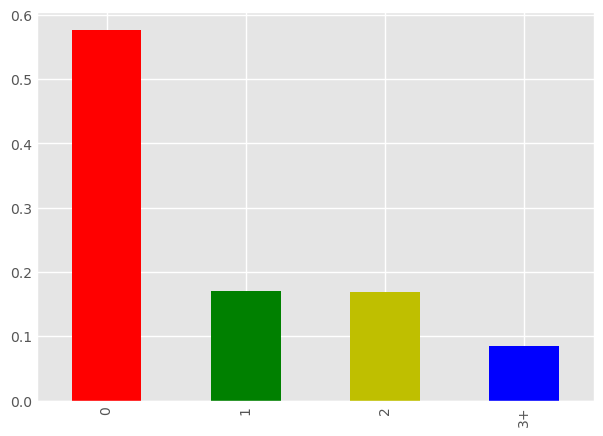

In [29]:
train['Dependents'].value_counts(normalize=True).plot(kind='bar',color=['r','g','y','blue'])

<Axes: >

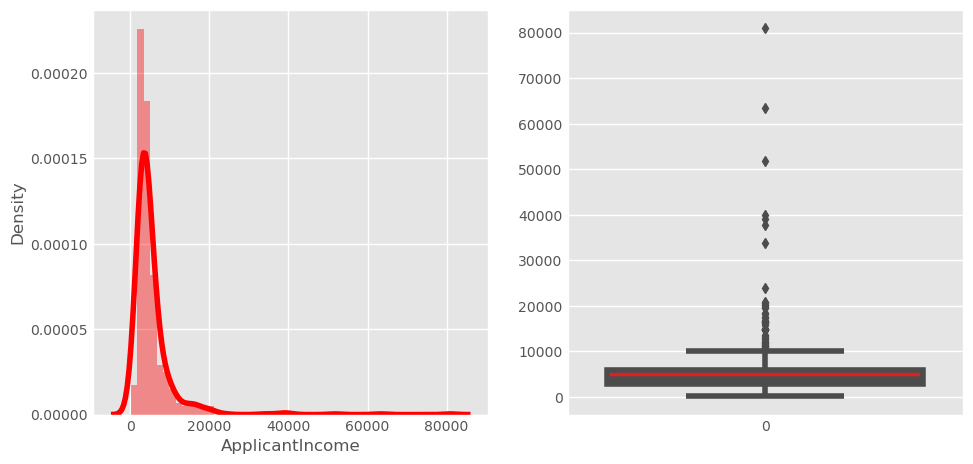

In [30]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(train['ApplicantIncome'],ax=axes[0],color='r')
sns.boxplot(train['ApplicantIncome'],ax=axes[1],color='red')

<Axes: >

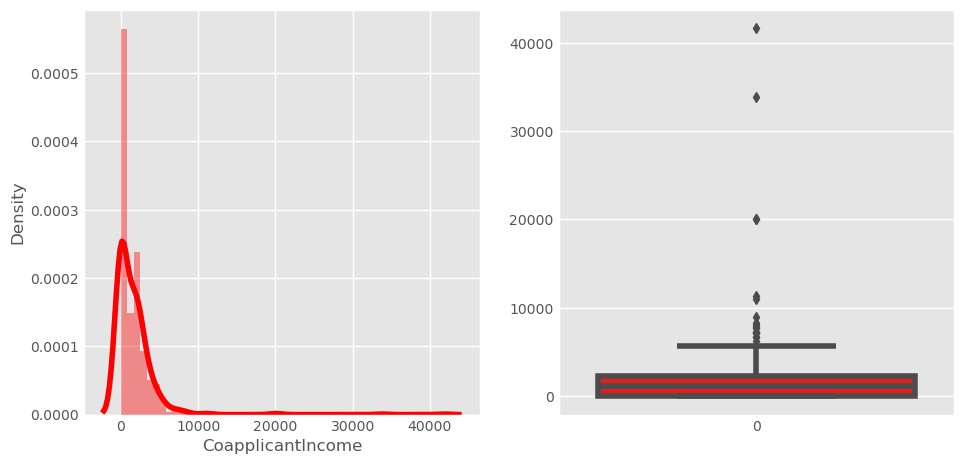

In [31]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(train['CoapplicantIncome'],ax=axes[0],color='r')
sns.boxplot(train['CoapplicantIncome'],ax=axes[1],color='red')

<Axes: >

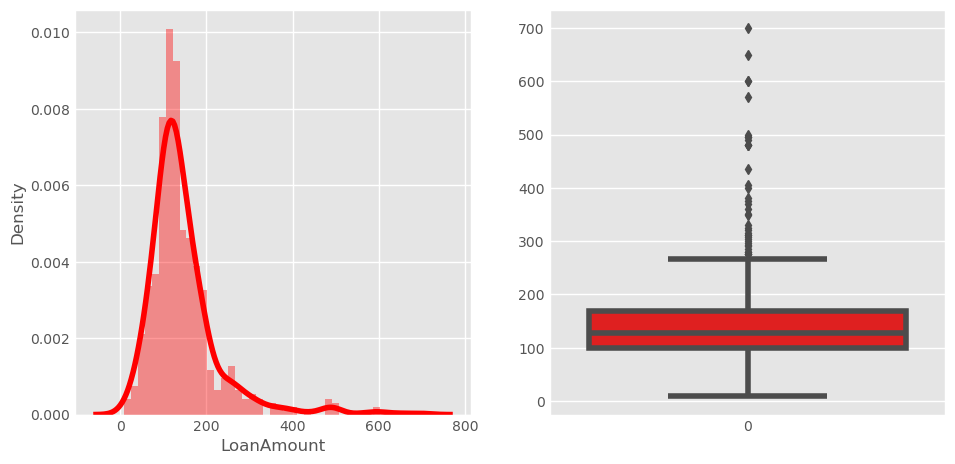

In [32]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(train['LoanAmount'],ax=axes[0],color='r')
sns.boxplot(train['LoanAmount'],ax=axes[1],color='red')

there are outliers in applicant income and coapplicant income and loan amount


# Bivariate Analysis

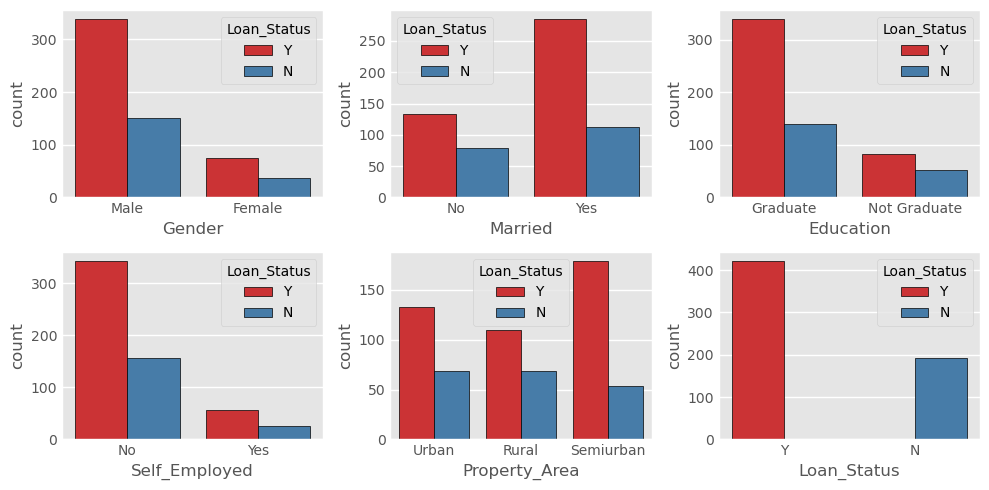

In [34]:
fig,axes=plt.subplots(2,3,figsize=(10,5))
axes=axes.flatten()
for i,col in enumerate(cat_cols):
    ax=axes[i]
    sns.countplot(x=col,hue='Loan_Status',data=train,palette='Set1', edgecolor='k',ax=axes[i])
plt.tight_layout()

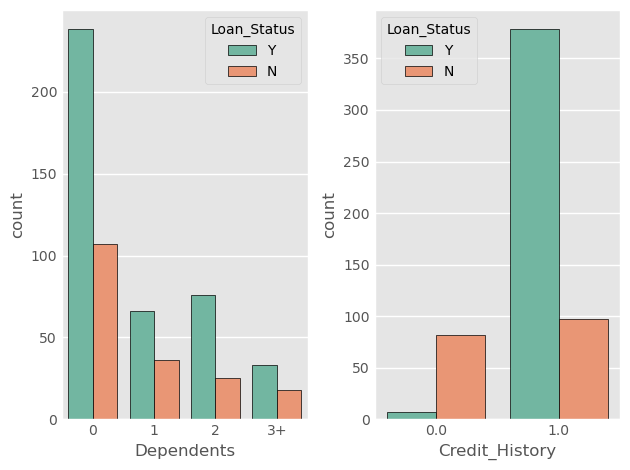

In [35]:
plt.subplot(121)
sns.countplot(x='Dependents',hue='Loan_Status',data=train,palette='Set2',edgecolor='black')
plt.subplot(122)
sns.countplot(x='Credit_History',hue='Loan_Status',data=train,palette='Set2',edgecolor='black')
plt.tight_layout()

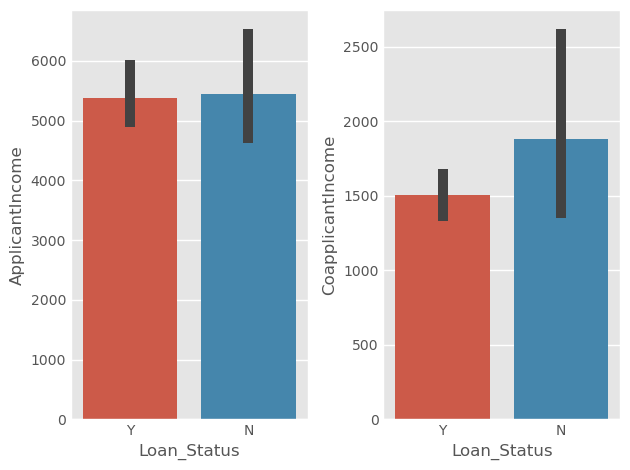

In [42]:
plt.subplot(121)
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=train)
plt.subplot(122)
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=train)
plt.tight_layout()

<Axes: >

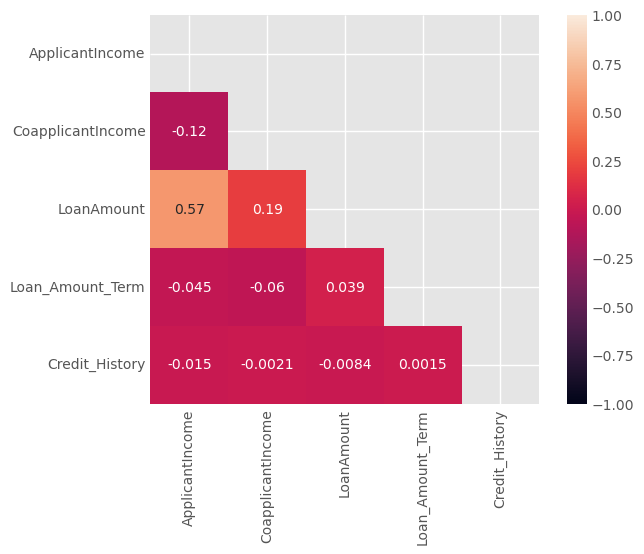

In [49]:
matrix=train.corr()
mask=np.triu(np.ones_like(matrix))
sns.heatmap(matrix,vmax=1,vmin=-1,square=True,annot=True,mask=mask)

# Data Preproccessing

In [41]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [2]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
train['Dependents']=train['Dependents'].astype('int')
test['Dependents']=test['Dependents'].astype('int')

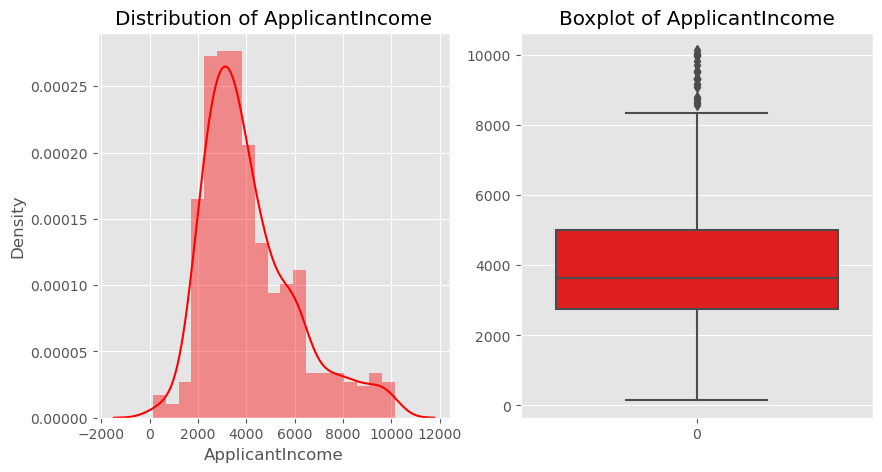

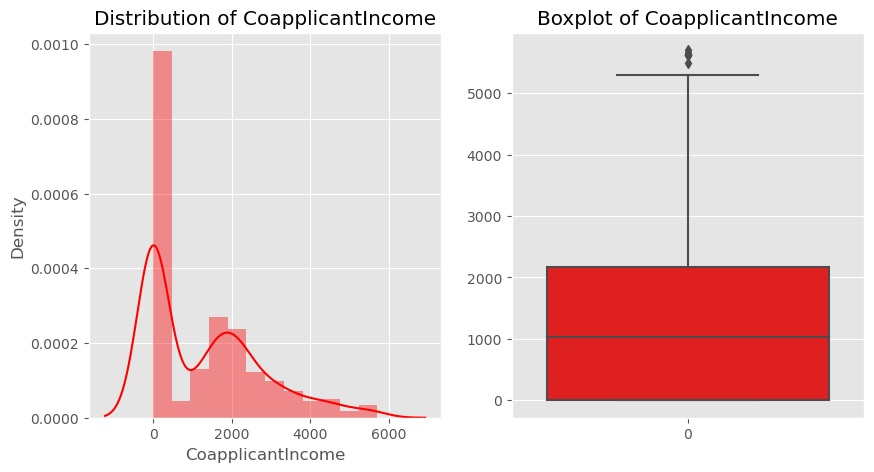

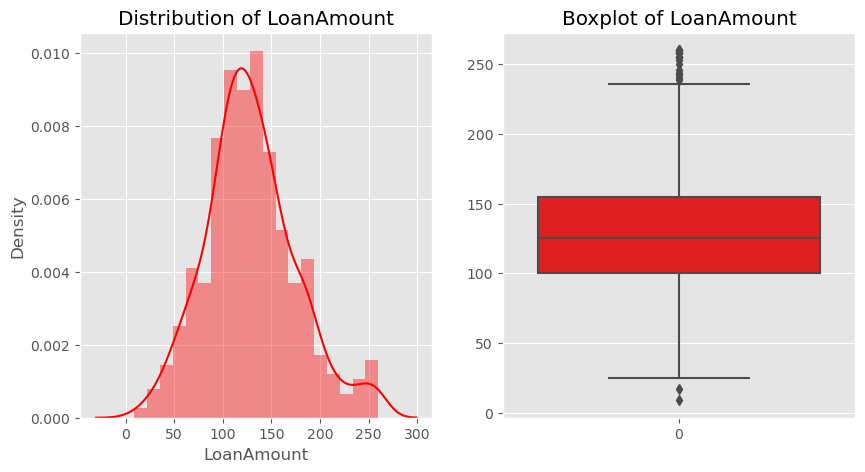

In [5]:
for i in train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    q3=train[i].quantile(.75)
    q1=train[i].quantile(.25)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    train1=train[(train[i] > lower) & (train[i] < upper)]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(train1[i], ax=axes[0], color='r')
    
    
    # Plot boxplot
    sns.boxplot(train1[i], ax=axes[1], color='r')
    
    # Set titles
    axes[0].set_title(f'Distribution of {i}')
    axes[1].set_title(f'Boxplot of {i}')

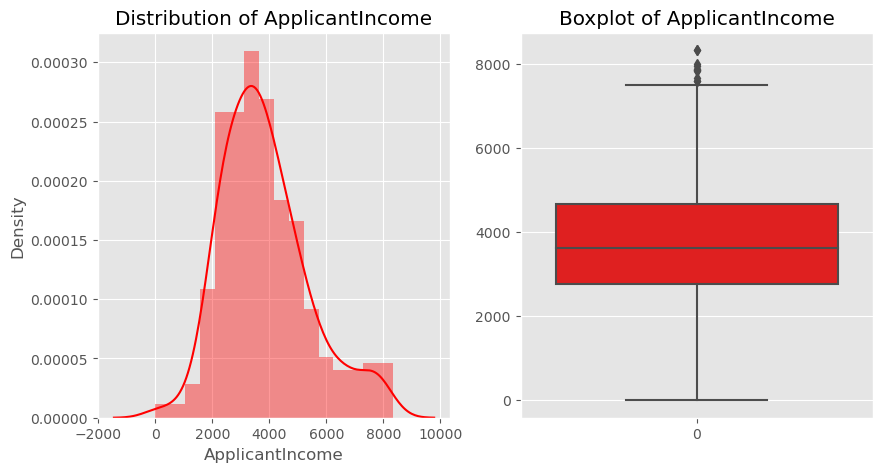

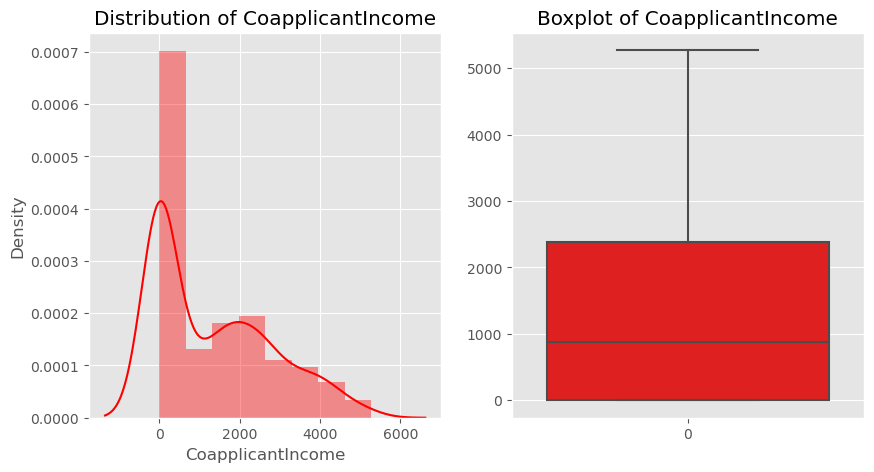

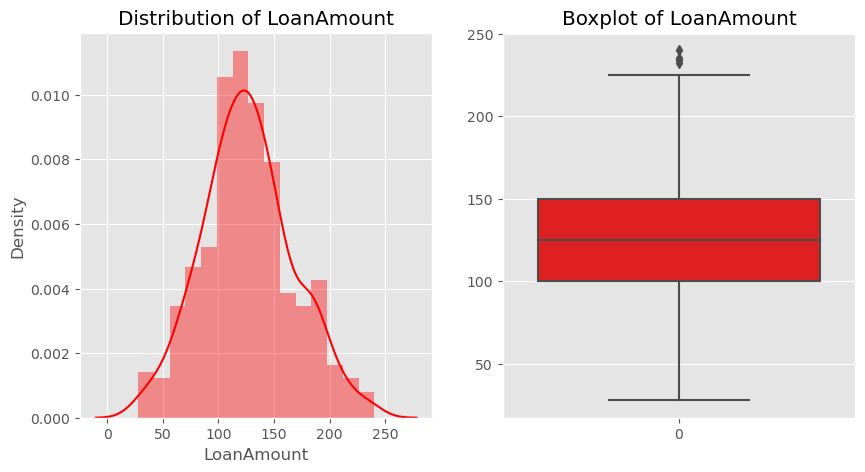

In [6]:
for i in test[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    q3=test[i].quantile(.75)
    q1=test[i].quantile(.25)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    test1=test[(test[i] > lower) & (test[i] < upper)]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(test1[i], ax=axes[0], color='r')
    
    # Plot boxplot
    sns.boxplot(test1[i], ax=axes[1], color='r')
    
    # Set titles
    axes[0].set_title(f'Distribution of {i}')
    axes[1].set_title(f'Boxplot of {i}')

In [3]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
x3=train1.drop(['Loan_ID','Loan_Status'],1)
test1=test.drop('Loan_ID',1)
y3=train1['Loan_Status']

In [32]:
cat_cols=[x for x in x3.dtypes.index if x3[x].dtype=='object']
cat_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    x3[i]=le.fit_transform(x3[i])

In [34]:
for i in cat_cols:
    test1[i]=le.fit_transform(test1[i])

In [35]:
from sklearn.model_selection import train_test_split
train_x3,test_x3,train_y3,test_y3=train_test_split(x3,y3,test_size=0.25,random_state=7)

In [41]:
svc=SVC(kernel='linear')
svc.fit(train_x3,train_y3)
accuracy_score(test_y3,svc.predict(test_x3))

0.8125

In [37]:
pred_test=svc.predict(test1)
submission['Loan_Status']=pred_test
submission.to_csv('svc.csv',index=False)

In [42]:
from sklearn.model_selection import GridSearchCV
grid = {

    'C':[0.01,0.1,1,10],

    'gamma' : [0.01,1]

}
svm_cv = GridSearchCV(svc, grid, cv = 5)
svm_cv.fit(train_x3,train_y3)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 1]})

In [43]:
svm_cv.best_params_, svm_cv.best_score_

({'C': 1, 'gamma': 0.01}, 0.8111354309165527)

In [59]:
x3['TotalIncome']=x3['ApplicantIncome']+x3['CoapplicantIncome']
test1['TotalIncome']=test1['ApplicantIncome']+test1['CoapplicantIncome']
x3['EMI']=(x3['LoanAmount']/x3['Loan_Amount_Term'])*100
test1['EMI']=(test1['LoanAmount']/test1['Loan_Amount_Term'])*100
x3['Balance_Income']=x3.TotalIncome-x3.EMI
test1['Balance_Income']=test1.TotalIncome-test1.EMI

<Axes: xlabel='loanamount_log', ylabel='Count'>

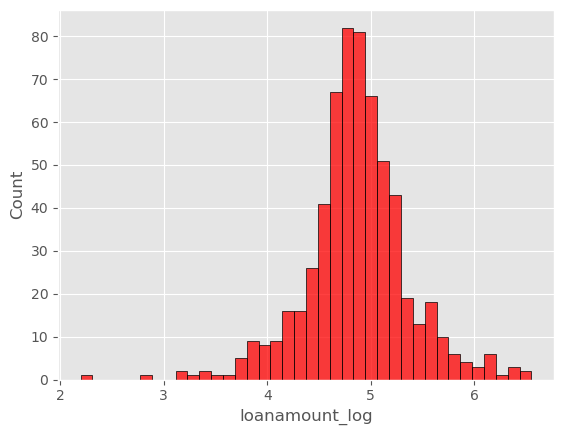

In [5]:
train['loanamount_log']=np.log(train.LoanAmount) # it creates new colum which contain log values of Loan Amount with outliers reduced
test['loanamount_log']=np.log(test.LoanAmount)
sns.histplot(x='loanamount_log',data=train,edgecolor='black',color='r')

<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

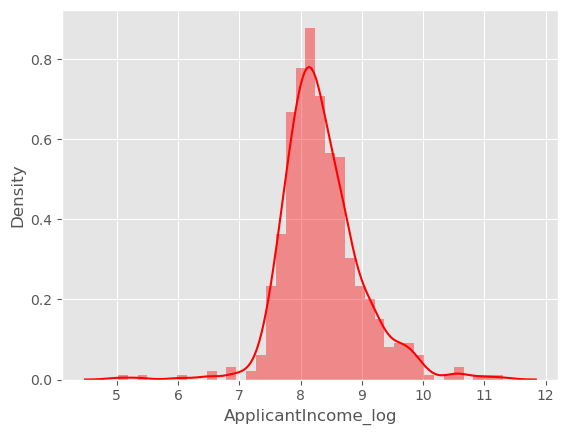

In [6]:
train['ApplicantIncome_log']=np.log(train.ApplicantIncome+1) # it creates new colum which contain log values of Loan Amount with outliers reduced
test['ApplicantIncome_log']=np.log(test.ApplicantIncome+1)
sns.distplot(train['ApplicantIncome_log'],color='r')

<Axes: xlabel='CoapplicantIncome_log', ylabel='Density'>

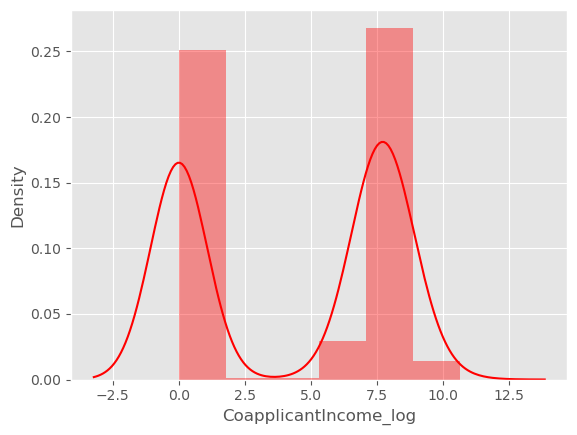

In [18]:
train['CoapplicantIncome_log']=np.log(train.CoapplicantIncome+1) # it creates new colum which contain log values of Loan Amount with outliers reduced
test['CoapplicantIncome_log']=np.log(test.CoapplicantIncome+1)
sns.distplot(train['CoapplicantIncome_log'],color='r')

In [7]:
train=train.drop('Loan_ID',axis=1)# it does not have any effect on loan status hence dropped
test=test.drop('Loan_ID',axis=1)

In [8]:
x=train.drop('Loan_Status',1)#sicketlearn requires target variable in separate database
y=train.Loan_Status

In [445]:
x['TotalIncome']=x['ApplicantIncome']+x['CoapplicantIncome']
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']
x['Loan_Amount_Term_Year']=x['Loan_Amount_Term']/12
test['Loan_Amount_Term_Year']=test['Loan_Amount_Term']/12
x['EMI']=(x['LoanAmount']/x['Loan_Amount_Term'])*100
test['EMI']=(test['LoanAmount']/test['Loan_Amount_Term'])*100
x['Balance_Income']=x.TotalIncome-x.EMI
test['Balance_Income']=test.TotalIncome-test.EMI
x['Debt_income_ratio']=x['EMI']/x['LoanAmount']
test['Debt_income_ratio']=test['EMI']/test['LoanAmount']

In [435]:
x.drop(['ApplicantIncome','CoapplicantIncome'],1,inplace=True)
test.drop(['ApplicantIncome','CoapplicantIncome'],1,inplace=True)
x.drop('Loan_Amount_Term',1,inplace=True)
test.drop('Loan_Amount_Term',1,inplace=True)

In [101]:
x['TotalIncome']=x['ApplicantIncome']+x['CoapplicantIncome']
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']


In [19]:
x1=train.drop('Loan_Status',1)
y1=train.Loan_Status
x1['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)
test['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)

In [10]:
cat_cols=[x for x in x1.dtypes.index if x1.dtypes[x]=='object']

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    x1[i]=le.fit_transform(x1[i])
    test[i]=le.fit_transform(test[i])

In [24]:
x1['l/a']=x1['LoanAmount']/x1['ApplicantIncome']

In [25]:
x1.drop(['ApplicantIncome','CoapplicantIncome'],1,inplace=True)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
train_x1,val_x1,train_y1,val_y1=train_test_split(x1,y1,test_size=0.15,random_state=42)
svc=SVC(kernel='linear')
svc.fit(train_x1,train_y1)
predictions=svc.predict(val_x1)
accuracy_score(val_y1,predictions)

0.7419354838709677

In [30]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(train_x1,train_y1)
predictions=nb.predict(val_x1)
accuracy_score(val_y1,predictions)

0.7419354838709677

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {

    'C':[0.01,0.1,1,10],

    'kernel' : ["linear","poly","rbf","sigmoid"],

    'degree' : [1,3,5,7],

    'gamma' : [0.01,1]

}
svm_cv = GridSearchCV(svc, grid, cv = 5)
svm_cv.fit(train_x1,train_y1)

In [ ]:
svm_cv.best_params_ , svm_cv.best_score_

In [111]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.15,random_state=42)

In [108]:
test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,totalincome_dependent
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,5967.214286
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,6572.931034


## Model Development


In [112]:
from catboost import CatBoostClassifier
cat_features=np.where(x.dtypes==object)[0]
def objective(trial):
    param = {
    'loss_function': 'Logloss',  # Use 'Logloss' for binary classification or 'MultiClass' for multiclass classification
    'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),  # Log uniform distribution
    'max_bin': trial.suggest_int('max_bin', 200, 400),  # Integer values
    'rsm':trial.suggest_uniform('rsm',0.3,1.0),
    'subsample': trial.suggest_uniform('subsample', 0.4, 1.0), 
    'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
    'iterations':1000,
    'max_depth': trial.suggest_categorical('max_depth', [5, 7, 9, 11, 13, 15]),
    'random_state': trial.suggest_categorical('random_state', [2020]),
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
    'eval_metric': 'Accuracy'
    }
    model=CatBoostClassifier(**param,cat_features=cat_features)
    model.fit(train_x,train_y,eval_set=(val_x,val_y),early_stopping_rounds=200,verbose=False)
    preds=model.predict(val_x)
    score=accuracy_score(val_y,preds)
    return score

In [113]:
import optuna
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=5)

[I 2024-04-12 12:03:53,699] A new study created in memory with name: no-name-79473035-b4ab-44c4-8c2f-a4d54e505d0c
[I 2024-04-12 12:03:59,841] Trial 0 finished with value: 0.7419354838709677 and parameters: {'l2_leaf_reg': 0.2522088308455295, 'max_bin': 285, 'rsm': 0.8440374680356202, 'subsample': 0.8505457744524937, 'learning_rate': 0.007681515779526391, 'max_depth': 7, 'random_state': 2020, 'min_data_in_leaf': 277}. Best is trial 0 with value: 0.7419354838709677.
[I 2024-04-12 12:04:14,099] Trial 1 finished with value: 0.7526881720430108 and parameters: {'l2_leaf_reg': 7.112137040832782e-05, 'max_bin': 267, 'rsm': 0.6190211538880206, 'subsample': 0.9619307611595922, 'learning_rate': 0.009144020319915154, 'max_depth': 13, 'random_state': 2020, 'min_data_in_leaf': 197}. Best is trial 1 with value: 0.7526881720430108.
[I 2024-04-12 12:04:29,606] Trial 2 finished with value: 0.7634408602150538 and parameters: {'l2_leaf_reg': 7.829667803891088e-05, 'max_bin': 341, 'rsm': 0.8447655191893189

In [114]:
best_trial=study.best_trial.params
best_trial

{'l2_leaf_reg': 7.829667803891088e-05,
 'max_bin': 341,
 'rsm': 0.8447655191893189,
 'subsample': 0.9963374813012247,
 'learning_rate': 0.0069411465044668524,
 'max_depth': 13,
 'random_state': 2020,
 'min_data_in_leaf': 234}

In [89]:
pred_test=model.predict(test)
submission['Loan_Status']=pred_test
submission.to_csv('CatBoost.csv',index=False)

In [115]:
model=CatBoostClassifier(**best_trial,cat_features=cat_features)
model.fit(train_x,train_y)
pred=model.predict(val_x)
accuracy_score(pred,val_y)

0:	learn: 0.6736665	total: 171ms	remaining: 2m 50s
1:	learn: 0.6702283	total: 192ms	remaining: 1m 35s
2:	learn: 0.6668921	total: 205ms	remaining: 1m 8s
3:	learn: 0.6505668	total: 400ms	remaining: 1m 39s
4:	learn: 0.6401793	total: 565ms	remaining: 1m 52s
5:	learn: 0.6207769	total: 762ms	remaining: 2m 6s
6:	learn: 0.6176479	total: 779ms	remaining: 1m 50s
7:	learn: 0.6092468	total: 878ms	remaining: 1m 48s
8:	learn: 0.6064875	total: 890ms	remaining: 1m 37s
9:	learn: 0.6037714	total: 902ms	remaining: 1m 29s
10:	learn: 0.6000550	total: 942ms	remaining: 1m 24s
11:	learn: 0.5947135	total: 995ms	remaining: 1m 21s
12:	learn: 0.5921557	total: 1.01s	remaining: 1m 16s
13:	learn: 0.5896265	total: 1.02s	remaining: 1m 11s
14:	learn: 0.5863314	total: 1.06s	remaining: 1m 9s
15:	learn: 0.5838999	total: 1.07s	remaining: 1m 5s
16:	learn: 0.5806455	total: 1.09s	remaining: 1m 3s
17:	learn: 0.5779856	total: 1.12s	remaining: 1m 1s
18:	learn: 0.5756796	total: 1.13s	remaining: 58.6s
19:	learn: 0.5708634	total: 1

0.7204301075268817

<Axes: >

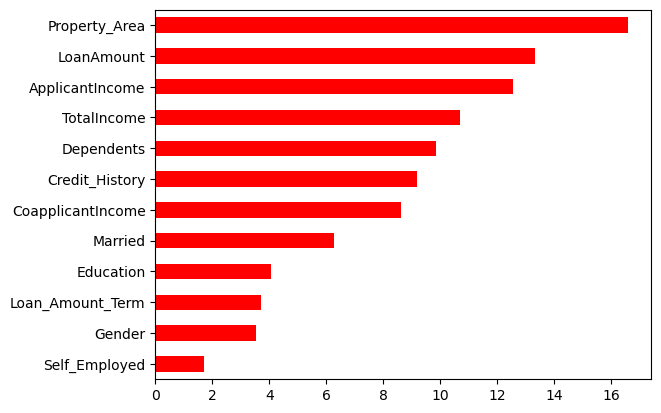

In [116]:
pd.Series(model.feature_importances_,x.columns).sort_values(ascending=True).plot(kind='barh',color='r')

In [108]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X['Gender']=encoder.fit_transform(X['Gender'])
X['Married']=encoder.fit_transform(X['Married'])
X['Education']=encoder.fit_transform(X['Education'])
X['Self_Employed']=encoder.fit_transform(X['Self_Employed'])
X['Property_Area']=encoder.fit_transform(X['Property_Area'])
test['Gender']=encoder.fit_transform(test['Gender'])
test['Married']=encoder.fit_transform(test['Married'])
test['Education']=encoder.fit_transform(test['Education'])
test['Self_Employed']=encoder.fit_transform(test['Self_Employed'])
test['Property_Area']=encoder.fit_transform(test['Property_Area'])
train['Gender']=encoder.fit_transform(train['Gender'])
train['Married']=encoder.fit_transform(train['Married'])
train['Education']=encoder.fit_transform(train['Education'])
train['Self_Employed']=encoder.fit_transform(train['Self_Employed'])
train['Property_Area']=encoder.fit_transform(train['Property_Area'])

In [35]:
from sklearn.model_selection import train_test_split# cv cross validation,x-indepndent variables,y-target variable
x_train,x_cv,y_train,y_cv= train_test_split(X,y,test_size=0.3)#30% is for cv and 70% data used for training

In [36]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loanamount_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,4.852030
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,5.533389
527,1,1,1,1,0,5285,1430.0,161.0,360.0,0.0,1,5.081404
412,1,1,0,1,0,6096,0.0,218.0,360.0,0.0,0,5.384495
444,1,1,0,0,0,7333,8333.0,175.0,300.0,1.0,0,5.164786
...,...,...,...,...,...,...,...,...,...,...,...,...
594,1,1,0,0,1,16120,0.0,260.0,360.0,1.0,2,5.560682
492,1,0,0,1,0,3691,0.0,110.0,360.0,1.0,0,4.700480
236,1,1,0,0,0,5746,0.0,255.0,360.0,1.0,2,5.541264
172,1,1,3,1,0,3522,0.0,81.0,180.0,1.0,0,4.394449


In [67]:
x_cv

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,loanamount_log,Total_Income,logtotal_income,EMI,Balance_Income
271,1,1,0,0,0,1.0,2,0.111795,0.638624,1.192350,-0.187793,0.641947
162,1,1,1,0,0,0.0,1,-0.124013,-0.411520,-0.527165,-0.269378,-0.410563
545,1,1,0,0,0,1.0,0,0.375662,-0.357440,-0.386065,-0.084453,-0.357796
44,1,1,0,1,1,1.0,2,-0.591015,-0.361004,-0.395038,-0.405352,-0.358823
306,0,0,0,0,0,1.0,0,0.096904,-0.247421,-0.128682,-0.193232,-0.246597
...,...,...,...,...,...,...,...,...,...,...,...,...
239,1,1,1,0,0,1.0,1,-0.591015,-0.574845,-1.034046,-0.405352,-0.573277
45,0,0,0,0,0,1.0,2,-0.766585,-0.560124,-0.982170,-0.448863,-0.558169
472,1,1,3,0,0,1.0,1,-0.508645,-0.361624,-0.396602,-0.383596,-0.359617
366,1,0,0,0,0,1.0,1,-0.591015,-0.701135,-1.552109,-0.535887,-0.698894


In [68]:
y_train

530    1
352    1
290    1
143    1
392    1
      ..
561    1
299    0
305    0
118    0
241    0
Name: Loan_Status, Length: 429, dtype: int64

In [69]:
y_cv

271    1
162    0
545    1
44     1
306    1
      ..
239    1
45     1
472    1
366    0
368    1
Name: Loan_Status, Length: 185, dtype: int64

# Model Building

In [115]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(train_x3, train_y3)

LogisticRegression()

In [116]:
pred_cv=model.predict(test_x3)
pred_cv

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y'], dtype=object)

In [117]:
accuracy_score(test_y3,pred_cv)#checking accuracy of the model

0.8263888888888888

In [29]:
pred_testdata=model.predict(test)

In [132]:
submission=pd.read_csv("Downloads/sample_submission_49d68Cx.csv")

In [253]:
submission.Loan_Status=pred_testdata
submission.Loan_ID=test_original.Loan_ID

In [301]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logisticRG.csv')

# predicting using stratified K-Fold

In [119]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=5,shuffle=True) # splitting the ds into 5 folds
for train_index,test_index in kf.split(x3,y3):#kf.split generates indices for different folds and stored in train_index and test_index
     print('n-{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = x3.iloc[train_index],x3.iloc[test_index]#splitting data into train and validation sets
     ytr,yvl = y3.iloc[train_index],y3.iloc[test_index]
     model = LogisticRegression(random_state=5)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


n-1 of kfold 5
accuracy_score 0.8173913043478261
n-2 of kfold 5
accuracy_score 0.808695652173913
n-3 of kfold 5
accuracy_score 0.8173913043478261
n-4 of kfold 5
accuracy_score 0.8157894736842105
n-5 of kfold 5
accuracy_score 0.8245614035087719


In [ ]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred_test)
auc=metrics.roc_auc_score(yvl,pred_test)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [604]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [605]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Stratified.csv')

# Feature Engineering

In [109]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<Axes: xlabel='Total_Income', ylabel='Density'>

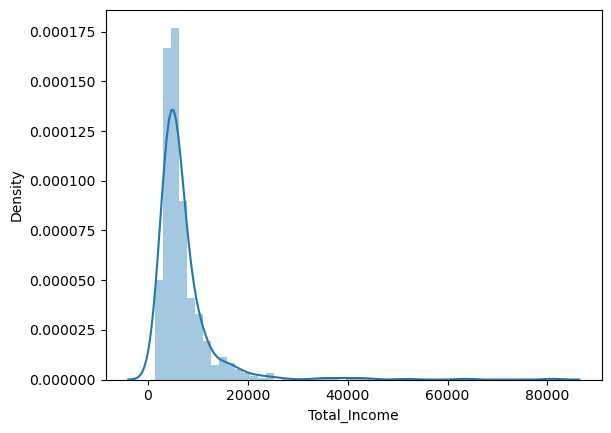

In [43]:
sns.distplot(train.Total_Income)# not normal dist and right skewed

In [110]:
train['logtotal_income']=np.log(train.Total_Income)# to convert the curve into nds
test['logtotal_income']=np.log(test.Total_Income)

<Axes: xlabel='logtotal_income', ylabel='Density'>

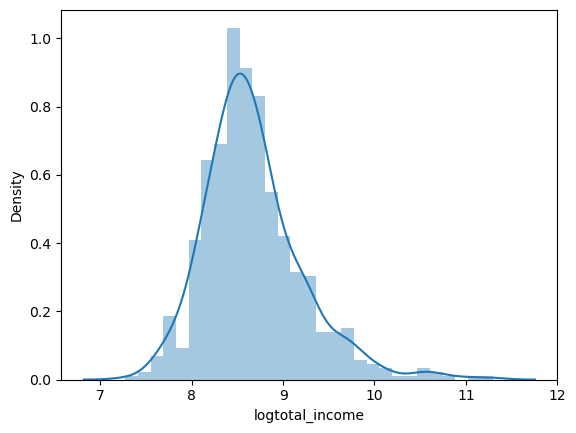

In [45]:
sns.distplot(train.logtotal_income)

In [111]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=train['LoanAmount']/test['Loan_Amount_Term']

<Axes: xlabel='EMI', ylabel='Density'>

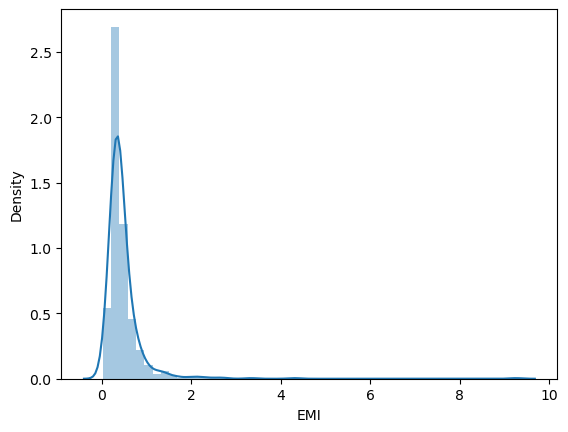

In [73]:
sns.distplot(train.EMI)

In [112]:
train['Balance_Income']=train.Total_Income-(train.EMI*100)
test['Balance_Income']=test.Total_Income-(test.EMI*100)

<Axes: xlabel='Balance_Income', ylabel='Density'>

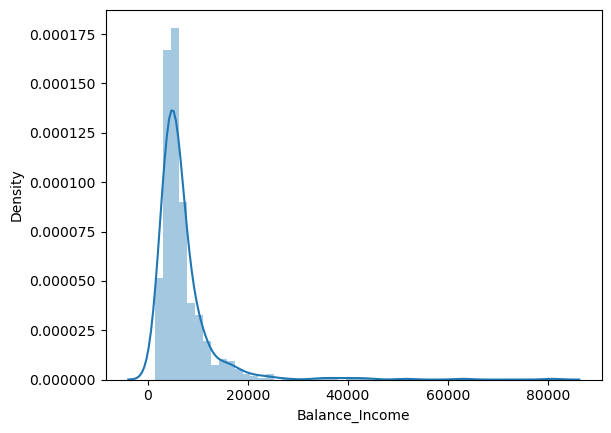

In [234]:
sns.distplot(train.Balance_Income)

In [113]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)# because the newly created features and hese will have high correlation which confuses the model
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

In [212]:
X['Total_Income']=train['Total_Income']
X['logtotal_income']=train['logtotal_income']
X['EMI']=train['EMI']
X['Balance_Income']=train['Balance_Income']

In [50]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loanamount_log,Total_Income,logtotal_income,EMI,Balance_Income
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,4.852030,5849.0,8.674026,0.355556,5813.444444
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,0.355556,6055.444444
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,4.189655,3000.0,8.006368,0.183333,2981.666667
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4.787492,4941.0,8.505323,0.333333,4907.666667
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,4.948760,6000.0,8.699515,0.391667,5960.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,4.262680,2900.0,7.972466,0.197222,2880.277778
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,3.688879,4106.0,8.320205,0.222222,4083.777778
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,5.533389,8312.0,9.025456,0.702778,8241.722222
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,5.231109,7583.0,8.933664,0.519444,7531.055556


In [115]:
X.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)# because the newly created features and hese will have high correlation which confuses the model

In [79]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Income',
       'loanamount_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income_bin_Low', 'Total_Income_bin_Average',
       'Total_Income_bin_High', 'Total_Income_bin_Very high',
       'logtotal_income', 'EMI', 'Balance_Income'],
      dtype='object')

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_cv,pred_cv)
cm

array([[ 22,  33],
       [  1, 129]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
class_report = classification_report(y_cv, pred_cv)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.40      0.56        55
           1       0.80      0.99      0.88       130

    accuracy                           0.82       185
   macro avg       0.88      0.70      0.72       185
weighted avg       0.84      0.82      0.79       185



# Decision Tree Classification

In [54]:
from sklearn import tree# using decision tree model
i=1
kf=StratifiedKFold(n_splits=5,random_state=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print("{} of kfold{}".format(i,kf.n_splits))
    train_x,val_x=X.loc[train_index],X.loc[test_index]
    train_y,val_y=y.loc[train_index],y.loc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(train_x,train_y)
    pred_test=model.predict(val_x)
    score=accuracy_score(val_y,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test) 

1 of kfold5
accuracy_score 0.7723577235772358
2 of kfold5
accuracy_score 0.6422764227642277
3 of kfold5
accuracy_score 0.7886178861788617
4 of kfold5
accuracy_score 0.7479674796747967
5 of kfold5
accuracy_score 0.7950819672131147


In [242]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [243]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [244]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [55]:
from sklearn.tree import DecisionTreeClassifier# my own implementation
model=DecisionTreeClassifier()
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [56]:
model.get_depth()

18

In [57]:
pred_train=model.predict(val_x)
accuracy=accuracy_score(val_y,pred_train)
accuracy

0.7950819672131147

In [58]:
print(classification_report(val_y,pred_train))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.86      0.83      0.85        84

    accuracy                           0.80       122
   macro avg       0.76      0.77      0.77       122
weighted avg       0.80      0.80      0.80       122



# Random Forest Classification

In [59]:
from sklearn.ensemble import RandomForestClassifier
i=1
sc=[]
kf=StratifiedKFold(n_splits=5,random_state=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of kfold{}'.format(i,kf.n_splits))
    train_x,val_x=X.iloc[train_index],X.iloc[test_index]
    train_y,val_y=y.loc[train_index],y.loc[test_index]
    model=RandomForestClassifier(random_state=5,max_depth=10)
    model.fit(train_x,train_y)
    pred_test=model.predict(val_x)
    score=accuracy_score(val_y,pred_test)
    print('accuracy_score',score)
    sc.append(score)
    i+=1
pred_test=model.predict(test) 

1 of kfold5
accuracy_score 0.8048780487804879
2 of kfold5
accuracy_score 0.7398373983739838
3 of kfold5
accuracy_score 0.8292682926829268
4 of kfold5
accuracy_score 0.7723577235772358
5 of kfold5
accuracy_score 0.860655737704918


In [60]:
model.n_estimators # no.of trees used

100

In [61]:
print('mean:',sum(sc)/len(sc))

mean: 0.8013994402239104


In [126]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search=GridSearchCV(cv=5, error_score='raise',       
                estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                criterion='gini', max_depth=None, max_features='auto', 
                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                min_samples_leaf=1, min_samples_split=2, 
                min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
                random_state=1, verbose=0, warm_start=False)
                , n_jobs=1,       
                param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
                pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [129]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=21,
                       n_jobs=1, random_state=1)

In [128]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 21}

In [127]:
grid_search.best_score_

0.8043228454172366

In [130]:
i=1
sc=[]
kf=StratifiedKFold(n_splits=5,random_state=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of kfold{}'.format(i,kf.n_splits))
    train_x,val_x=X.iloc[train_index],X.iloc[test_index]
    train_y,val_y=y.loc[train_index],y.loc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=21)
    model.fit(train_x,train_y)
    pred_test=model.predict(val_x)
    score=accuracy_score(val_y,pred_test)
    print('accuracy_score',score)
    sc.append(score)
    i+=1
pred_test=model.predict(test) 
pred2=model.predict_proba(test)[:,1]

1 of kfold5
accuracy_score 0.8048780487804879
2 of kfold5
accuracy_score 0.7560975609756098
3 of kfold5
accuracy_score 0.8292682926829268
4 of kfold5
accuracy_score 0.8130081300813008
5 of kfold5
accuracy_score 0.860655737704918


In [131]:
print('mean:',sum(sc)/len(sc))

mean: 0.8127815540450486


In [342]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [344]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random  Forest.csv')

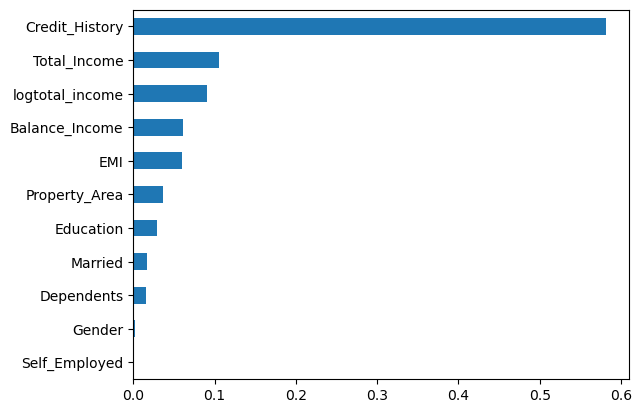

In [132]:
importance=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True).plot(kind='barh')

In [172]:
cols=['loanamount_log','Total_Income','logtotal_income','EMI','Balance_Income']

In [262]:
X[cols]=train[cols]

Text(50.722222222222214, 0.5, 'Actual')

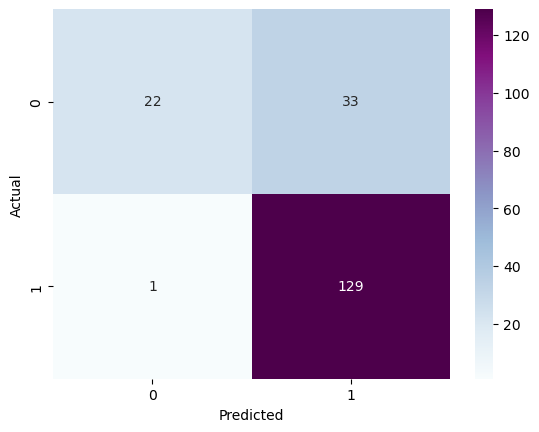

In [62]:
from sklearn.metrics import confusion_matrix # we can see false negatives are more
cm=confusion_matrix(y_cv,pred_cv)
sns.heatmap(cm,annot=True,cmap='BuPu',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,pred_cv))

              precision    recall  f1-score   support

           0       0.96      0.40      0.56        55
           1       0.80      0.99      0.88       130

    accuracy                           0.82       185
   macro avg       0.88      0.70      0.72       185
weighted avg       0.84      0.82      0.79       185



In [64]:
from imblearn.over_sampling import SMOTE #oversampling
smote=SMOTE(random_state=5)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
x_cv_resampled, y_cv_resampled = smote.fit_resample(x_cv, y_cv)
model.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=10, random_state=5)

In [65]:
pred_test=model.predict(x_cv_resampled)
accuracy_score(y_cv_resampled,pred_test)

0.7538461538461538

Text(50.722222222222214, 0.5, 'Actual')

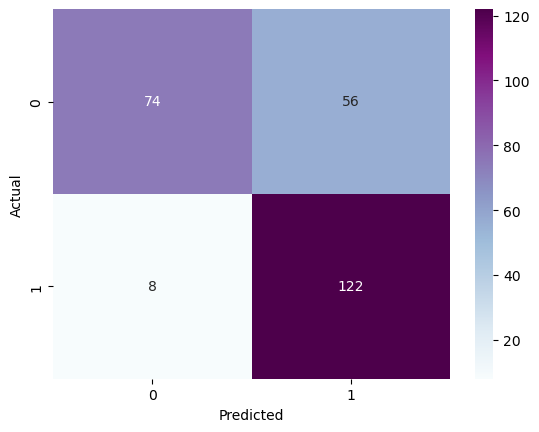

In [66]:
from sklearn.metrics import confusion_matrix # we can see false negatives are more
cm=confusion_matrix(y_cv_resampled,pred_test)
sns.heatmap(cm,annot=True,cmap='BuPu',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [137]:
pred_proba1=model.predict_proba(x_cv_resampled)[:,1]
adjusted_threshold=0.3
pred_proba1_adjusted=(pred_proba1>adjusted_threshold).astype(int)

In [268]:
pred_proba1_adjusted

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_cv_resampled,pred_proba1_adjusted))

              precision    recall  f1-score   support

           0       0.89      0.45      0.60       130
           1       0.63      0.95      0.76       130

    accuracy                           0.70       260
   macro avg       0.76      0.70      0.68       260
weighted avg       0.76      0.70      0.68       260



In [272]:
pred_test=model.predict(test)

In [273]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [274]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('lghyperparametertuning.csv')

In [67]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression() 
param_grid = {'penalty':['l1','l2','elasticnet','none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search = GridSearchCV(model,param_grid,scoring='accuracy',verbose=0)
grid_search.fit(x_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [68]:
grid_search.best_estimator_

LogisticRegression(C=0.001, penalty='none', solver='newton-cg')

In [69]:
grid_search.best_score_ # score without penalty is high so we are not proceeding with this

0.8112995896032832

In [73]:
model=LogisticRegression(C=0.001,penalty='none',solver='newton-cg')
model.fit(x_train,y_train) 
pred_test=model.predict(x_cv)
accuracy_score(y_cv,pred_test)

0.8054054054054054

# Xgboost

In [117]:
cols=['Total_Income','logtotal_income','EMI','Balance_Income']

In [118]:
from sklearn.preprocessing import StandardScaler #feature scaling
st=StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [173]:
train['Dependents']=train['Dependents'].astype('int')
test['Dependents']=test['Dependents'].astype('int')
X['Dependents']=X['Dependents'].astype('int')
train_x['Dependents']=train_x['Dependents'].astype('int')

In [78]:
from xgboost import XGBClassifier
i=1
sc=[]
kf = StratifiedKFold(n_splits=5,random_state=5,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    train_x,val_x = X.loc[train_index],X.loc[test_index] 
    train_y,val_y = y[train_index],y[test_index] 
    model = XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=5,
 min_child_weight=7,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)   
    model.fit(train_x, train_y) 
    pred_test = model.predict(val_x) 
    score = accuracy_score(val_y,pred_test) 
    print('accuracy_score',score) 
    sc.append(score)
    i+=1 

n1 of kfold 5
accuracy_score 0.7967479674796748
n2 of kfold 5
accuracy_score 0.7479674796747967
n3 of kfold 5
accuracy_score 0.8373983739837398
n4 of kfold 5
accuracy_score 0.8130081300813008
n5 of kfold 5
accuracy_score 0.8524590163934426


In [79]:
print('mean:',sum(sc)/len(sc))

mean: 0.8095161935225909


In [80]:
pred_test_xg=model.predict(val_x)
accuracy_score(val_y,pred_test_xg)

0.8524590163934426

In [81]:
pred_testxgb=model.predict(test)

In [568]:
submission['Loan_Status']=pred_testxgb
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [569]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGboost.csv')

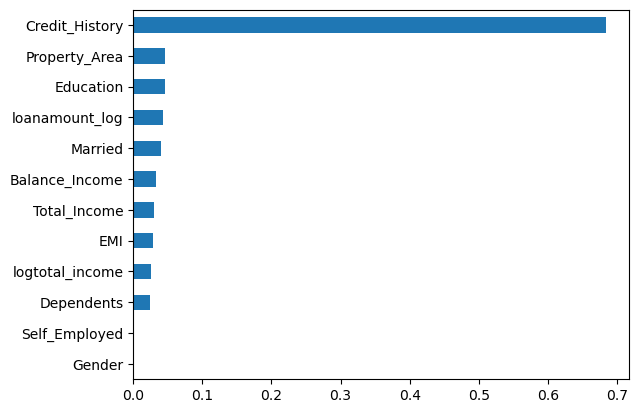

In [83]:
importance=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True).plot(kind='barh')

In [120]:
X.drop(['Gender','Self_Employed'],axis=1,inplace=True)
test.drop(['Gender','Self_Employed'],axis=1,inplace=True)

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv= train_test_split(X,y,test_size=0.2)

In [135]:
model1=XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=5,
 min_child_weight=7,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)  
model1.fit(x_train,y_train)
pred_test=model.predict(x_cv)
accuracy_score(y_cv,pred_test)

0.8292682926829268

In [167]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [ ]:

!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

In [168]:

%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History):   
 
    # Pre-processing user input    
    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1
 
    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1  
 
    LoanAmount = LoanAmount / 1000
 
    # Making predictions 
    prediction = classifier.predict( 
        [[Gender, Married, Dependents, Education, Self_Employed,
                                     Credit_History, Property_Area, loanamount_log, Total_Income,
                                     logtotal_income, EMI, Balance_Income]])
     
    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox('Gender', ["Male", "Female"])
    Married = st.selectbox('Marital Status', ["Unmarried", "Married"]) 
    Dependents = st.number_input("Number of Dependents", min_value=0, step=1)
    Education = st.selectbox('Education', ["Not Graduate", "Graduate"])
    Self_Employed = st.selectbox('Self Employed', ["No", "Yes"])
    Credit_History = st.selectbox('Credit History', ["Unclear Debts", "No Unclear Debts"])
    Property_Area = st.selectbox('Property Area', ["Urban", "Semiurban", "Rural"])
    LoanAmount = st.number_input("Total Loan Amount", min_value=0)
    Total_Income = st.number_input("Total Monthly Income", min_value=0)
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)
     
if __name__=='__main__': 
    main()

Writing app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

In [172]:
X.drop(['EMI','Balance_Income'],axis=1,inplace=True)
test.drop(['EMI','Balance_Income'],axis=1,inplace=True)


In [452]:
from xgboost import XGBClassifier
i=1
sc=[]
kf = StratifiedKFold(n_splits=5,random_state=5,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    train_x,val_x = X.loc[train_index],X.loc[test_index] 
    train_y,val_y = y[train_index],y[test_index] 
    model = XGBClassifier(
 learning_rate =0.01,
 n_estimators=400,
 max_depth=5,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)   
    model.fit(train_x, train_y) 
    pred_test = model.predict(val_x) 
    score = accuracy_score(val_y,pred_test) 
    print('accuracy_score',score) 
    sc.append(score)
    i+=1 

n1 of kfold 5
accuracy_score 0.7967479674796748
n2 of kfold 5
accuracy_score 0.7642276422764228
n3 of kfold 5
accuracy_score 0.8373983739837398
n4 of kfold 5
accuracy_score 0.8130081300813008
n5 of kfold 5
accuracy_score 0.8524590163934426


In [454]:
print('mean:',sum(sc)/len(sc))

mean: 0.8127682260429161


In [453]:
pred_test_xg=model.predict(val_x)
accuracy_score(val_y,pred_test_xg)

0.8524590163934426

In [455]:
import pickle 
pickle_out = open("classifier.pkl1", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [198]:
%%writefile app.py

import pickle
import streamlit as st

# loading the trained model
pickle_in = open('classifier.pkl1', 'rb') 
classifier = pickle.load(pickle_in)

@st.cache_data()
def prediction(Married, Dependents, Education,
               Credit_History, Property_Area, Total_Income, LoanAmount):  
    # Pre-processing user input    
    if Education == "Not Graduate":
        Education = 0
    else:
        Education = 1

    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1

    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1 

    if Property_Area == "Rural":
        Property_Area = 0
    elif Property_Area == "Urban":
        Property_Area = 1
    else:
        Property_Area = 2

    # Making predictions 
    prediction = classifier.predict([[Married, Dependents, Education, Credit_History, Property_Area, Total_Income, LoanAmount]])

    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred

# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html=True) 

    # following lines create boxes in which the user can enter data required to make a prediction 
    Married = st.selectbox('Marital Status', ["Unmarried", "Married"]) 
    Dependents = st.number_input("Number of Dependents", min_value=0, step=1)
    Education = st.selectbox('Education', ["Not Graduate", "Graduate"])

    Credit_History = st.selectbox('Credit History', ["Unclear Debts", "No Unclear Debts"])
    Property_Area = st.selectbox('Property Area', ["Urban", "Semiurban", "Rural"])
    LoanAmount = st.number_input("Total Loan Amount", min_value=0)
    Total_Income = st.number_input("Total Monthly Income", min_value=0)

    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Married, Dependents, Education,
                            Credit_History, Property_Area, Total_Income, LoanAmount) 
        
        # Styling for different colors and font size
        if result == 'Rejected':
            result_html = f'<p style="color:red; font-size:40px;">Your loan is {result}</p>'
        else:
            result_html = f'<p style="color:green; font-size:40px;">Your loan is {result}</p>'

        # Display the result
        st.markdown(result_html, unsafe_allow_html=True)

if __name__=='__main__': 
    main()


Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null&
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

In [ ]:
from pyngrok import ngrok

# Set the authtoken to authenticate with ngrok
ngrok.set_auth_token("2bno6JKvcry39gLg17dISBRjk5K_3MkH7XUFaTQzWvHYCeFFs")

# Connect to ngrok
public_url = ngrok.connect('8080')
print('Ngrok Tunnel "http://127.0.0.1:4040" -> "{}"'.format(public_url))

In [449]:
X.dropna()
test.dropna()

,Married,Education,Credit_History,Property_Area,Total_Income,LoanAmount,Loan_Amount_Term,logtotal_income,EMI,Balance_Income
0,1,0,1.0,2,5720,110.0,360.0,8.674026,0.355556,5813.444444
1,1,0,1.0,2,4576,126.0,360.0,8.714568,0.355556,6055.444444
2,1,0,1.0,2,6800,208.0,360.0,8.006368,0.183333,2981.666667
3,1,0,1.0,2,4886,100.0,360.0,8.505323,0.333333,4907.666667
4,0,1,1.0,2,3276,78.0,360.0,8.699515,0.391667,5960.833333
...,...,...,...,...,...,...,...,...,...,...
362,1,1,1.0,2,5786,113.0,360.0,8.865453,0.361111,7046.888889
363,1,0,1.0,2,4867,115.0,360.0,8.707152,0.316667,6014.333333
364,0,0,1.0,1,5243,126.0,360.0,8.827908,0.391667,6782.833333
365,1,0,1.0,0,7393,158.0,360.0,8.734882,0.369444,6179.055556


In [208]:
X['Loan_Amount_Term']=train['Loan_Amount_Term']
test['Loan_Amount_Term']=test_original['Loan_Amount_Term']
X.drop('Dependents',axis=1,inplace=True)
test.drop('Dependents',axis=1,inplace=True)

In [213]:
test['logtotal_income']=train['logtotal_income']
test['EMI']=train['EMI']
test['Balance_Income']=train['Balance_Income']

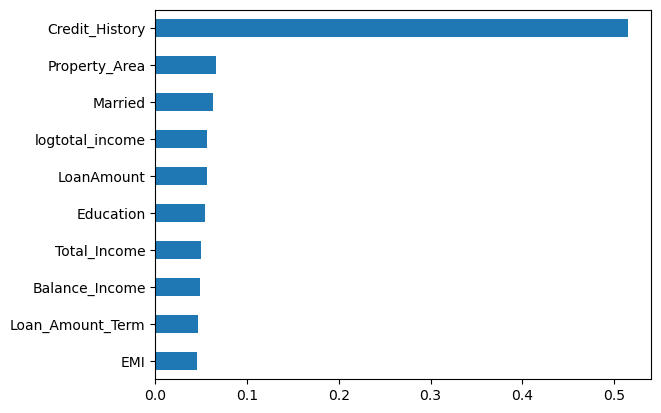

In [446]:
importance=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True).plot(kind='barh')

In [456]:
X.dtypes

Married               int32
Education             int32
Credit_History      float64
Property_Area         int32
Total_Income        float64
LoanAmount          float64
Loan_Amount_Term    float64
logtotal_income     float64
EMI                 float64
Balance_Income      float64
dtype: object